<a href="https://colab.research.google.com/github/carlotamartin/Parcial-1-Introducci-n-a-la-IA/blob/main/Sesion18_Bloque3_Cierre_Clasificacion_BigData%2B_Tomas_Salcedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596.0    51.0    3.0                             258.0   
1          2590.0    56.0    2.0                             212.0   
2          2804.0   139.0    9.0                             268.0   
3          2785.0   155.0   18.0                             242.0   
4          2595.0    45.0    2.0                             153.0   
...           ...     ...    ...                               ...   
581007     2396.0   153.0   20.0                              85.0   
581008     2391.0   152.0   19.0                              67.0   
581009     2386.0   159.0   17.0                              60.0   
581010     2384.0   170.0   15.0                              60.0   
581011     2383.0   165.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0.0                            510.0   
1                                 -6.0                            390.0   
2                                 65.0                           3180.0   
3                                118.0                           3090.0   
4                                 -1.0                            391.0   
...                                ...                              ...   
581007                            17.0                            108.0   
581008                            12.0                             95.0   
581009                             7.0                             90.0   
581010                             5.0                             90.0   
581011                             4.0                             67.0   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               221.0           232.0          148.0   
1               220.0           235.0          151.0   
2               234.0           238.0          135.0   
3               238.0           238.0          122.0   
4               220.0           234.0          150.0   
...               ...             ...            ...   
581007          240.0           237.0          118.0   
581008          240.0           237.0          119.0   
581009          236.0           241.0          130.0   
581010          230.0           245.0          143.0   
581011          231.0           244.0          141.0   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                   6279.0  ...           0.0           0.0   
1                                   6225.0  ...           0.0           0.0   
2                                   6121.0  ...           0.0           0.0   
3                                   6211.0  ...           0.0           0.0   
4                                   6172.0  ...           0.0           0.0   
...                                    ...  ...           ...           ...   
581007                               837.0  ...           0.0           0.0   
581008                               845.0  ...           0.0           0.0   
581009                               854.0  ...           0.0           0.0   
581010                               864.0  ...           0.0           0.0   
581011                               875.0  ...           0.0           0.0   

        Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
581007           0.0           0.0           0.0           0.0           0.0   
5810

Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         2596.0    51.0    3.0                             258.0   
1         2590.0    56.0    2.0                             212.0   
2         2804.0   139.0    9.0                             268.0   
3         2785.0   155.0   18.0                             242.0   
4         2595.0    45.0    2.0                             153.0   
...          ...     ...    ...                               ...   
99995     3100.0    52.0   16.0                             376.0   
99996     3090.0    50.0   16.0                             361.0   
99997     3083.0    45.0   18.0                             335.0   
99998     3077.0    41.0   15.0                             309.0   
99999     3073.0    50.0   12.0                             283.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 0.0                            510.0   
1                                -6.0                            390.0   
2                                65.0                           3180.0   
3                               118.0                           3090.0   
4                                -1.0                            391.0   
...                               ...                              ...   
99995                            50.0                           3816.0   
99996                            40.0                           3840.0   
99997                            33.0                           3864.0   
99998                            43.0                           3889.0   
99999                            52.0                           3913.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              221.0           232.0          148.0   
1              220.0           235.0          151.0   
2              234.0           238.0          135.0   
3              238.0           238.0          122.0   
4              220.0           234.0          150.0   
...              ...             ...            ...   
99995          227.0           203.0          105.0   
99996          225.0           202.0          106.0   
99997          222.0           198.0          104.0   
99998          221.0           205.0          116.0   
99999          225.0           214.0          121.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  6279.0  ...           0.0           0.0   
1                                  6225.0  ...           0.0           0.0   
2                                  6121.0  ...           0.0           0.0   
3                                  6211.0  ...           0.0           0.0   
4                                  6172.0  ...           0.0           0.0   
...                                   ...  ...           ...           ...   
99995                              4295.0  ...           0.0           0.0   
99996                              4268.0  ...           0.0           0.0   
99997                              4241.0  ...           0.0           0.0   
99998                              4214.0  ...           0.0           0.0   
99999                              4187.0  ...           0.0           0.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


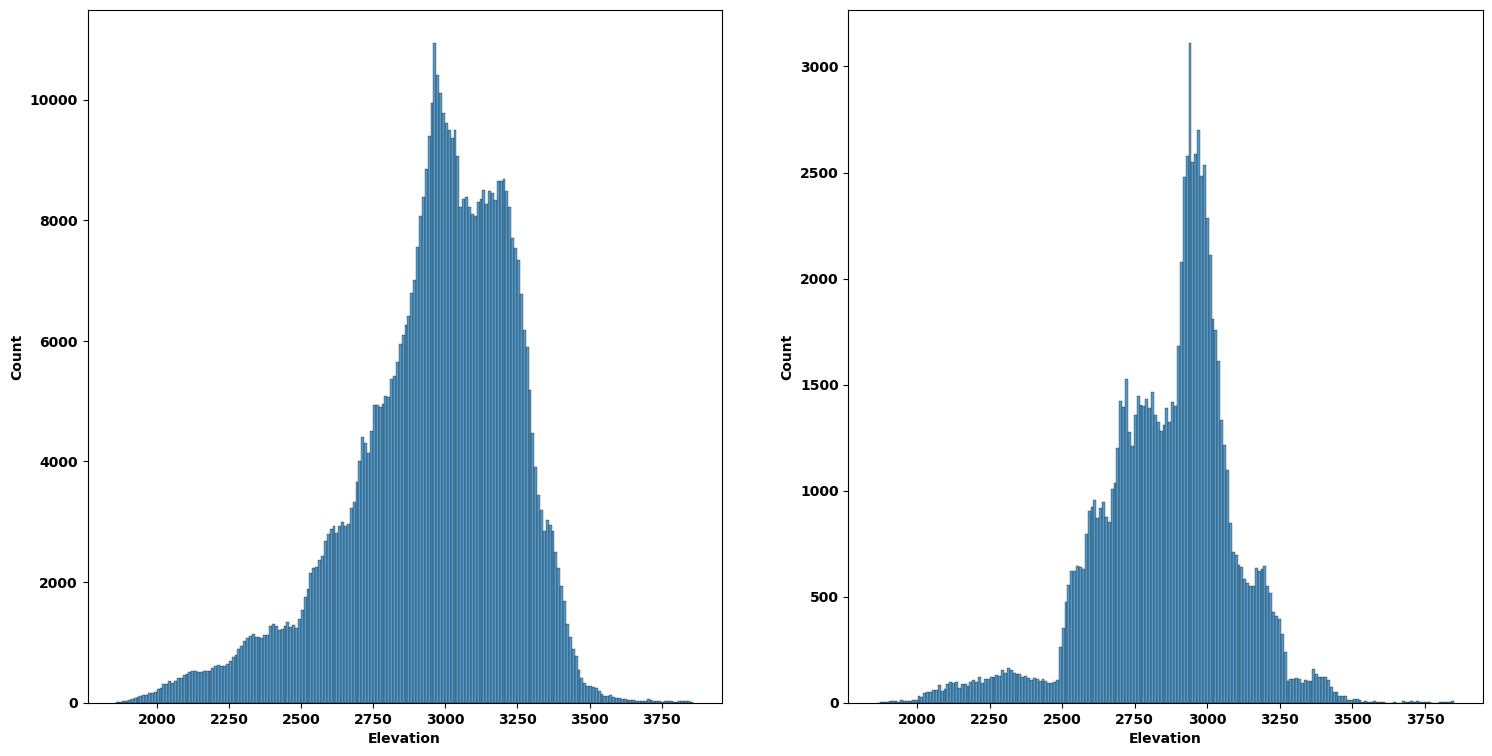

In [8]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [9]:
100/6

16.666666666666668

In [10]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3311.0     3.0   13.0                             551.0   
1         2429.0    70.0   29.0                              95.0   
2         2324.0   315.0   14.0                             124.0   
3         2959.0   346.0   10.0                              90.0   
4         2910.0    62.0   15.0                             330.0   
...          ...     ...    ...                               ...   
99995     2908.0    59.0   15.0                             633.0   
99996     2379.0   292.0   21.0                              95.0   
99997     2786.0   147.0    7.0                              42.0   
99998     2863.0    36.0   10.0                             514.0   
99999     2970.0    63.0   23.0                             495.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               106.0                           2780.0   
1                                18.0                           1589.0   
2                                43.0                            391.0   
3                                20.0                           5876.0   
4                                97.0                           3246.0   
...                               ...                              ...   
99995                           271.0                           1036.0   
99996                            37.0                           1321.0   
99997                             7.0                           2162.0   
99998                            26.0                           2746.0   
99999                           182.0                           2006.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              202.0           215.0          149.0   
1              237.0           169.0           43.0   
2              182.0           228.0          185.0   
3              200.0           223.0          162.0   
4              231.0           208.0          106.0   
...              ...             ...            ...   
99995          230.0           208.0          107.0   
99996          155.0           230.0          213.0   
99997          229.0           239.0          143.0   
99998          219.0           217.0          132.0   
99999          233.0           185.0           71.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  2220.0  ...           0.0           0.0   
1                                   391.0  ...           0.0           0.0   
2                                   560.0  ...           0.0           0.0   
3                                  3979.0  ...           0.0           0.0   
4                                  2275.0  ...           1.0           0.0   
...                                   ...  ...           ...           ...   
99995                               577.0  ...           0.0           1.0   
99996                               330.0  ...           0.0           0.0   
99997                              1574.0  ...           0.0           0.0   
99998                              3550.0  ...           0.0           0.0   
99999                              2171.0  ...           0.0           1.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           1.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

In [11]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

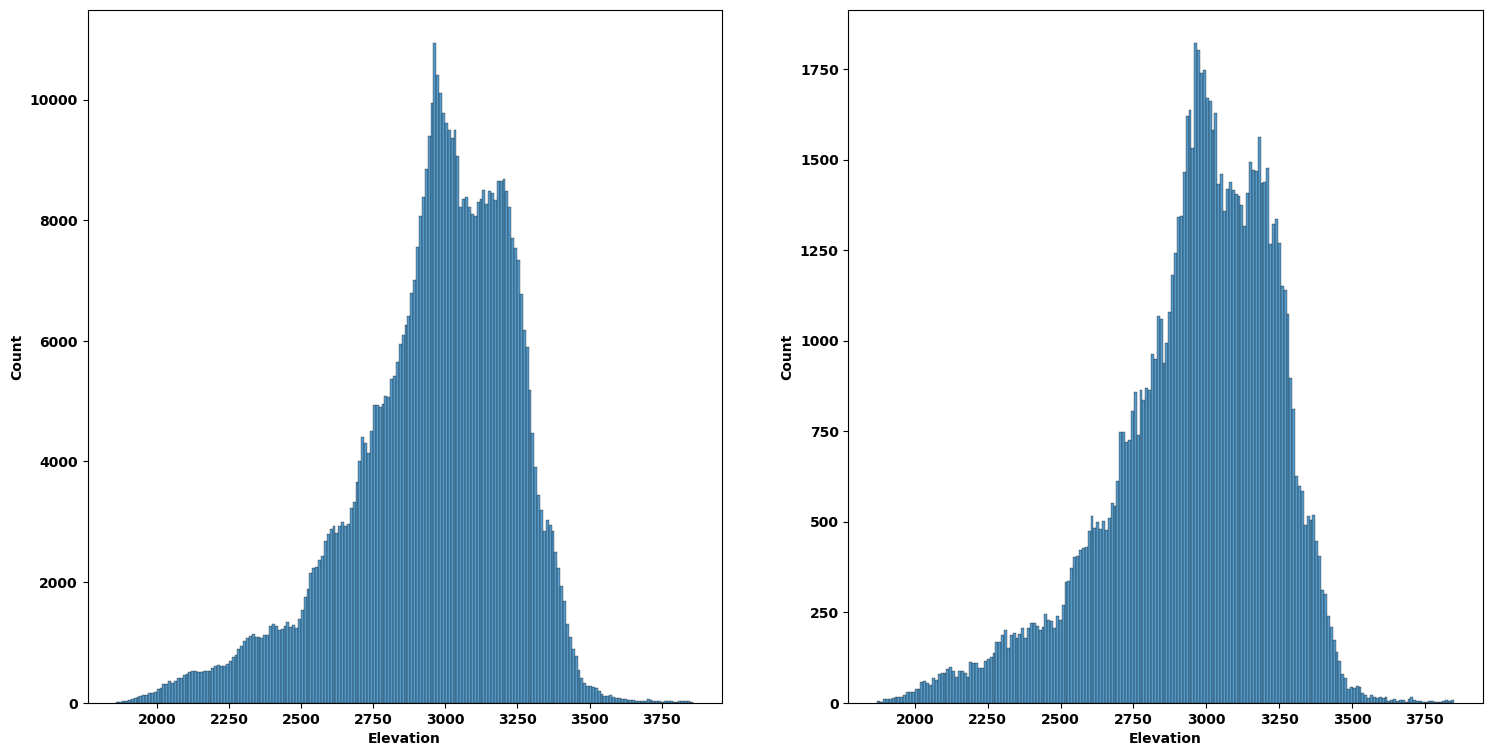

In [12]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

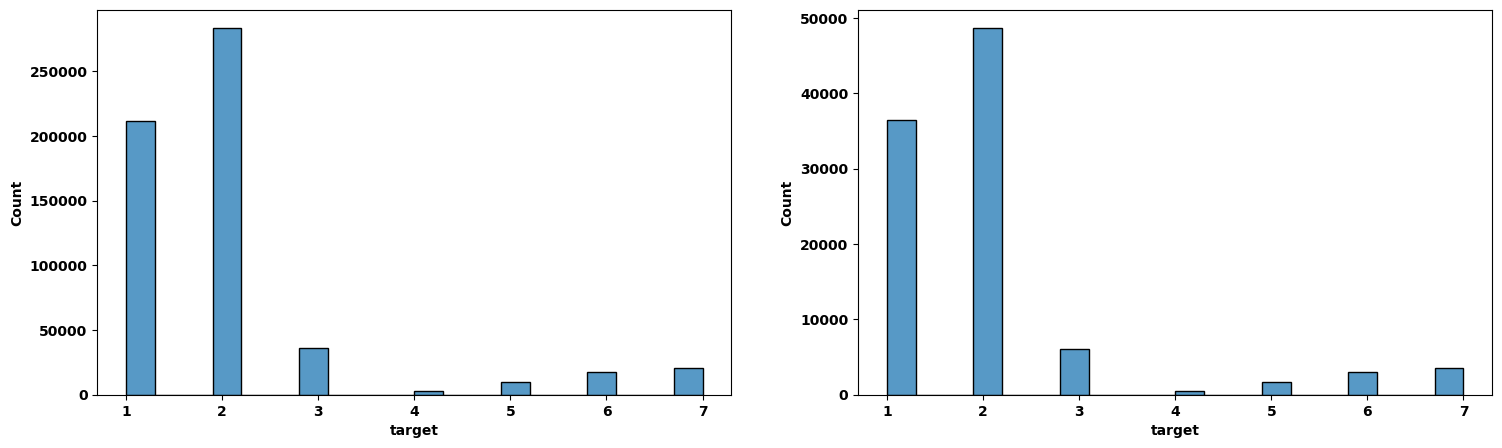

In [13]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [14]:
df_cub.describe()

Elevation         Aspect          Slope  \
count  100000.000000  100000.000000  100000.000000   
mean     2959.010060     155.927130      14.078440   
std       279.864034     111.880189       7.466349   
min      1871.000000       0.000000       0.000000   
25%      2810.000000      59.000000       9.000000   
50%      2995.000000     127.000000      13.000000   
75%      3163.000000     261.000000      18.000000   
max      3849.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     100000.000000                   100000.000000   
mean                         268.415310                       45.890660   
std                          212.389266                       57.923415   
min                            0.000000                     -164.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       29.000000   
75%                          384.000000                       68.000000   
max                         1390.000000                      592.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    100000.000000  100000.000000   100000.000000   
mean                       2356.444880     212.226180      223.392060   
std                        1559.881883      26.567206       19.768911   
min                           0.000000       0.000000        0.000000   
25%                        1110.000000     198.000000      213.000000   
50%                        2005.000000     218.000000      226.000000   
75%                        3336.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type_31  \
count  100000.000000                       100000.000000  ...  100000.000000   
mean      142.541110                         1984.702670  ...       0.091120   
std        38.116316                         1328.355754  ...       0.287781   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1022.000000  ...       0.000000   
50%       143.000000                         1712.000000  ...       0.000000   
75%       168.000000                         2553.000000  ...       0.000000   
max       253.000000                         7168.000000  ...       1.000000   

        Soil_Type_32   Soil_Type_33   Soil_Type_34   Soil_Type_35  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.078660       0.003050       0.003510       0.000190   
std         0.269209       0.055143       0.059141       0.013783   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_Type_36   Soil_Type_37   Soil_Type_38   Soil_Type_39  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000510       0.026360       0.023650       0.014600   
std         0.022578       0.160204       0.151957       0.119946   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             target  
count  100000.00000  
mean        2.05919  
std         1.40864  
min         1.00000  
25%         1.00000  
50%         2.00000  
75%         2.00000  
max         7.00000  

[8 rows x 55 columns]

In [15]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [16]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [17]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area_0, Wilderness_Area_1, Wilderness_Area_2, Wilderness_Area_3, Soil_Type_0, Soil_Type_1, Soil_Type_2, Soil_Type_3, Soil_Type_4, Soil_Type_5, Soil_Type_6, Soil_Type_7, Soil_Type_8, Soil_Type_9, Soil_Type_10, Soil_Type_11, Soil_Type_12, Soil_Type_13, Soil_Type_14, Soil_Type_15, Soil_Type_16, Soil_Type_17, Soil_Type_18, Soil_Type_19, Soil_Type_20, Soil_Type_21, Soil_Type_22, Soil_Type_23, Soil_Type_24, Soil_Type_25, Soil_Type_26, Soil_Type_27, Soil_Type_28, Soil_Type_29, Soil_Type_30, Soil_Type_31, Soil_Type_32, Soil_Type_33, Soil_Type_34, Soil_Type_35, Soil_Type_36, Soil_Type_37, Soil_Type_38, Soil_Type_39, target]
Index: []

[0 rows x 55 columns]

### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [18]:
#Importamos la librería para la selección de variables basadas en árboles de decisión

from sklearn.tree import DecisionTreeClassifier

In [19]:
#Utilizamos el DataFrame `Target`:
df_cub

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3311.0     3.0   13.0                             551.0   
1         2429.0    70.0   29.0                              95.0   
2         2324.0   315.0   14.0                             124.0   
3         2959.0   346.0   10.0                              90.0   
4         2910.0    62.0   15.0                             330.0   
...          ...     ...    ...                               ...   
99995     2908.0    59.0   15.0                             633.0   
99996     2379.0   292.0   21.0                              95.0   
99997     2786.0   147.0    7.0                              42.0   
99998     2863.0    36.0   10.0                             514.0   
99999     2970.0    63.0   23.0                             495.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               106.0                           2780.0   
1                                18.0                           1589.0   
2                                43.0                            391.0   
3                                20.0                           5876.0   
4                                97.0                           3246.0   
...                               ...                              ...   
99995                           271.0                           1036.0   
99996                            37.0                           1321.0   
99997                             7.0                           2162.0   
99998                            26.0                           2746.0   
99999                           182.0                           2006.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              202.0           215.0          149.0   
1              237.0           169.0           43.0   
2              182.0           228.0          185.0   
3              200.0           223.0          162.0   
4              231.0           208.0          106.0   
...              ...             ...            ...   
99995          230.0           208.0          107.0   
99996          155.0           230.0          213.0   
99997          229.0           239.0          143.0   
99998          219.0           217.0          132.0   
99999          233.0           185.0           71.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  2220.0  ...           0.0           0.0   
1                                   391.0  ...           0.0           0.0   
2                                   560.0  ...           0.0           0.0   
3                                  3979.0  ...           0.0           0.0   
4                                  2275.0  ...           1.0           0.0   
...                                   ...  ...           ...           ...   
99995                               577.0  ...           0.0           1.0   
99996                               330.0  ...           0.0           0.0   
99997                              1574.0  ...           0.0           0.0   
99998                              3550.0  ...           0.0           0.0   
99999                              2171.0  ...           0.0           1.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           1.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

In [20]:
#Dividimos el dataset en variables predictoras (X) y variable objetivo (y), que en este caso es ´target´
X = df_cub.drop(columns=['target'])
y = df_cub['target']

In [21]:
#Creamos el modelo de árbol de decisión y lo ajustamos con el dataset reducido
dtc = DecisionTreeClassifier(random_state=100)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=100)

In [22]:
#Calculamos la importancia de cada variable en el modelo de árbol de decisión
importance = dtc.feature_importances_

In [23]:
importance

array([3.39690350e-01, 3.42020867e-02, 2.25021191e-02, 6.32194427e-02,
       4.70460958e-02, 1.36626794e-01, 3.44835673e-02, 3.99102415e-02,
       2.52322688e-02, 1.28417056e-01, 9.84762887e-03, 3.69510751e-03,
       1.08273156e-02, 1.14932908e-03, 2.98687701e-04, 1.00983292e-02,
       1.50024780e-03, 1.18620329e-02, 5.39069517e-04, 1.16029772e-03,
       0.00000000e+00, 0.00000000e+00, 1.44949317e-04, 3.45548364e-03,
       6.73395361e-04, 1.05973244e-03, 3.19010392e-03, 7.30559511e-05,
       0.00000000e+00, 1.15074001e-03, 1.60892537e-03, 3.09187617e-05,
       7.83699341e-04, 3.03539896e-03, 3.40407542e-04, 8.30125269e-03,
       8.13495129e-03, 4.03540177e-03, 1.31659961e-04, 2.28728255e-04,
       2.37286420e-04, 1.26790001e-04, 7.68914237e-03, 2.95153880e-03,
       4.87891646e-03, 1.36891371e-02, 3.67943270e-03, 1.87977708e-04,
       1.19404236e-03, 2.82530650e-05, 3.08047675e-05, 1.53715870e-03,
       3.93489702e-03, 1.14775002e-03])

In [24]:
import pandas as pd

In [25]:
#Creamos un DataFrame con las imprtancias y los nombres de las variables
importances_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})

In [26]:
importances_df.head()

Variable  Importance
0                         Elevation    0.339690
1                            Aspect    0.034202
2                             Slope    0.022502
3  Horizontal_Distance_To_Hydrology    0.063219
4    Vertical_Distance_To_Hydrology    0.047046

In [27]:
#Ordenamos el DataFrame por importancia descendente
importances_df = importances_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_df.head()

Variable  Importance
0                           Elevation    0.339690
1     Horizontal_Distance_To_Roadways    0.136627
2  Horizontal_Distance_To_Fire_Points    0.128417
3    Horizontal_Distance_To_Hydrology    0.063219
4      Vertical_Distance_To_Hydrology    0.047046

In [28]:
#Creamos una columna con la acumulación de la importancia de cada variable
#Utilizamos la función `cumsum`, la cual va almacenando la suma de variable de forma acomulativa. En este caso la columna
importances_df['Cumulative_Importance'] = np.cumsum(importances_df['Importance'])

In [29]:
importances_df.head()

Variable  Importance  Cumulative_Importance
0                           Elevation    0.339690               0.339690
1     Horizontal_Distance_To_Roadways    0.136627               0.476317
2  Horizontal_Distance_To_Fire_Points    0.128417               0.604734
3    Horizontal_Distance_To_Hydrology    0.063219               0.667954
4      Vertical_Distance_To_Hydrology    0.047046               0.715000

In [30]:
importances_df.shape

(54, 3)

In [31]:
importances_df.tail()

Variable  Importance  Cumulative_Importance
49  Soil_Type_36    0.000031               0.999972
50  Soil_Type_35    0.000028               1.000000
51  Soil_Type_14    0.000000               1.000000
52   Soil_Type_7    0.000000               1.000000
53   Soil_Type_6    0.000000               1.000000

Ahora filtramos las variables que aglutinan <95%

In [32]:
#Filtramos el DataFrame para quedarnos solamente con las variables que aglutinan hasta el 95% de la información
selected_features = importances_df.loc[importances_df['Cumulative_Importance'] <= 0.95, 'Variable']

In [33]:
selected_features.shape

(17,)

In [34]:
selected_features.head()

0                             Elevation
1       Horizontal_Distance_To_Roadways
2    Horizontal_Distance_To_Fire_Points
3      Horizontal_Distance_To_Hydrology
4        Vertical_Distance_To_Hydrology
Name: Variable, dtype: object

In [35]:
#Creamos un nuevo DataFrame con las variables seleccionadas y la variable objetivo
selected_df = df_cub[['target']].join(df_cub[selected_features])

In [36]:
#Mostramos el nuevo DataFrame con las variables seleccionadas y la variable objetivo
selected_df.head()

target  Elevation  Horizontal_Distance_To_Roadways  \
0       7     3311.0                           2780.0   
1       3     2429.0                           1589.0   
2       3     2324.0                            391.0   
3       2     2959.0                           5876.0   
4       2     2910.0                           3246.0   

   Horizontal_Distance_To_Fire_Points  Horizontal_Distance_To_Hydrology  \
0                              2220.0                             551.0   
1                               391.0                              95.0   
2                               560.0                             124.0   
3                              3979.0                              90.0   
4                              2275.0                             330.0   

   Vertical_Distance_To_Hydrology  Hillshade_Noon  Hillshade_9am  Aspect  \
0                           106.0           215.0          202.0     3.0   
1                            18.0           169.0          237.0    70.0   
2                            43.0           228.0          182.0   315.0   
3                            20.0           223.0          200.0   346.0   
4                            97.0           208.0          231.0    62.0   

   Hillshade_3pm  Slope  Soil_Type_31  Soil_Type_3  Wilderness_Area_2  \
0          149.0   13.0           0.0          0.0                1.0   
1           43.0   29.0           0.0          0.0                1.0   
2          185.0   14.0           0.0          0.0                0.0   
3          162.0   10.0           0.0          0.0                0.0   
4          106.0   15.0           1.0          0.0                1.0   

   Soil_Type_1  Wilderness_Area_0  Soil_Type_21  Soil_Type_22  
0          0.0                0.0           0.0           0.0  
1          0.0                0.0           0.0           0.0  
2          0.0                0.0           0.0           0.0  
3          0.0                1.0           0.0           0.0  
4          0.0                0.0           0.0           0.0

In [37]:
selected_df.shape

(100000, 18)

---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

Para poder visualizar la distribución de las variables del dataset del conjutno, podemosutilizar una amtriz de gráficos de dispersión y histogramas.

Esto nos permite ver la distribución de cada variable individualmente y como se relacionan entre sí

In [38]:
#Importamos librerías
import seaborn as sns

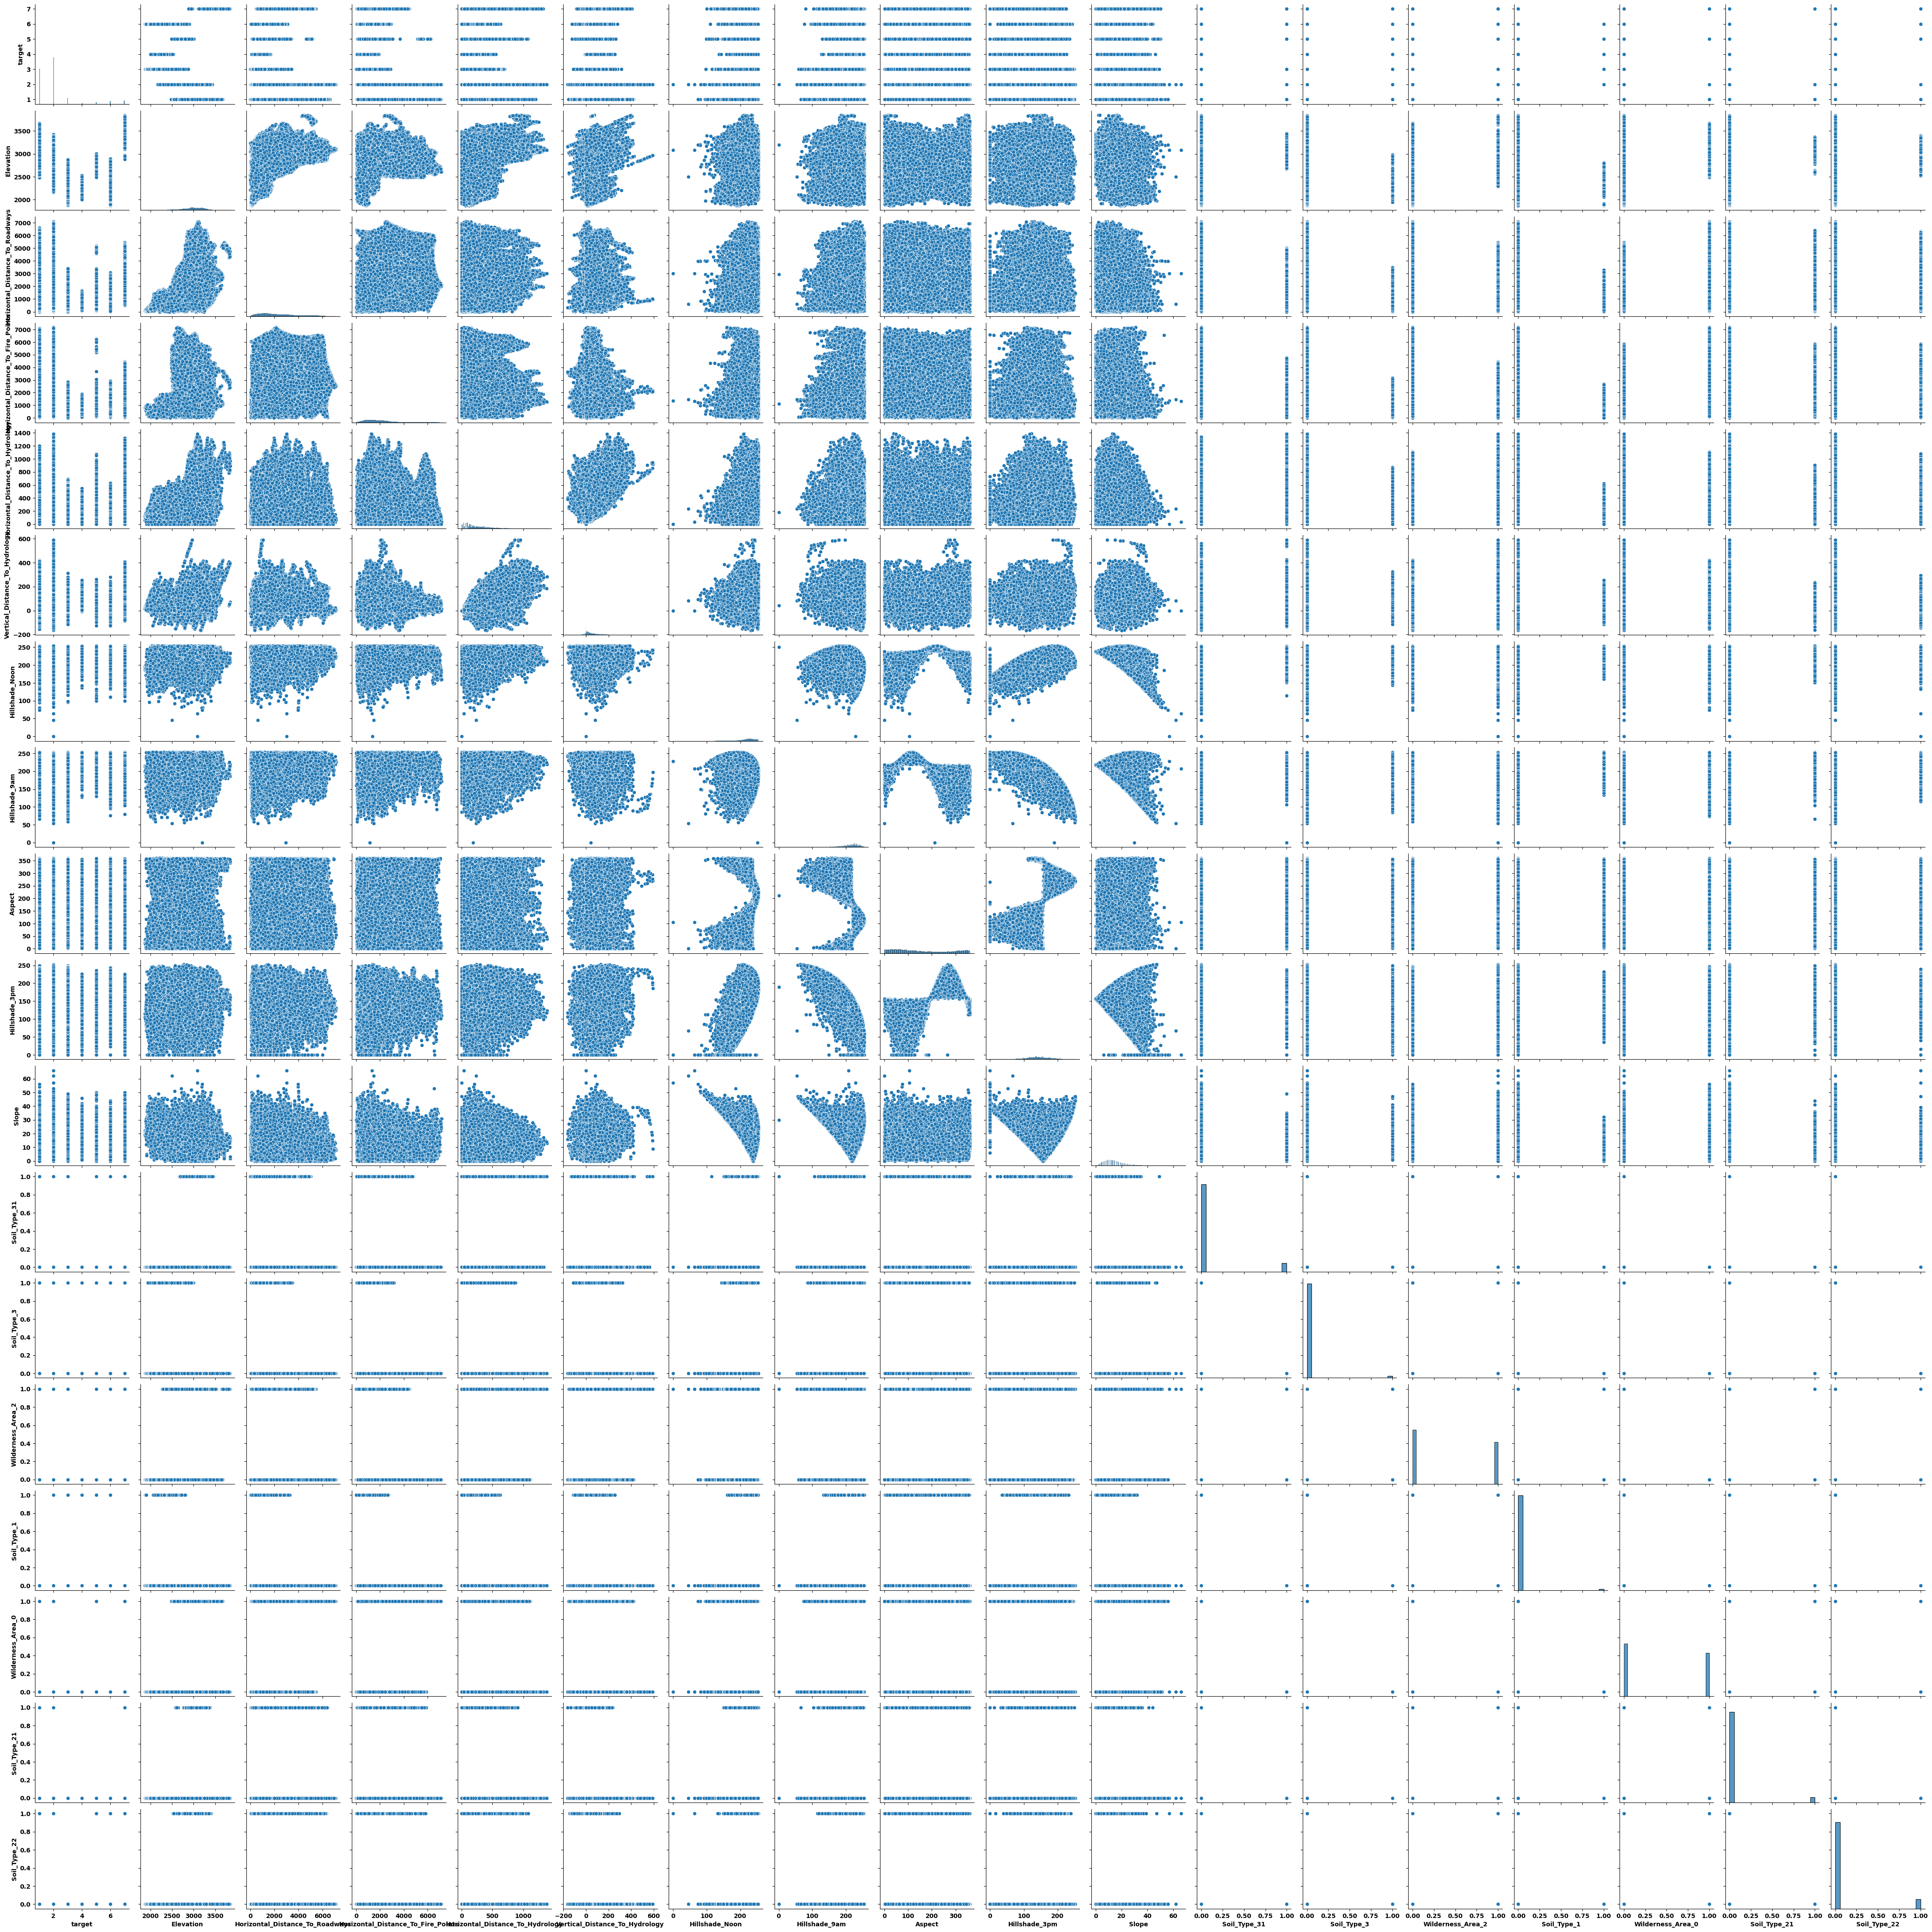

In [39]:
sns.pairplot(selected_df)

In [ ]:
selected_df.plot.hist()
plt.show()

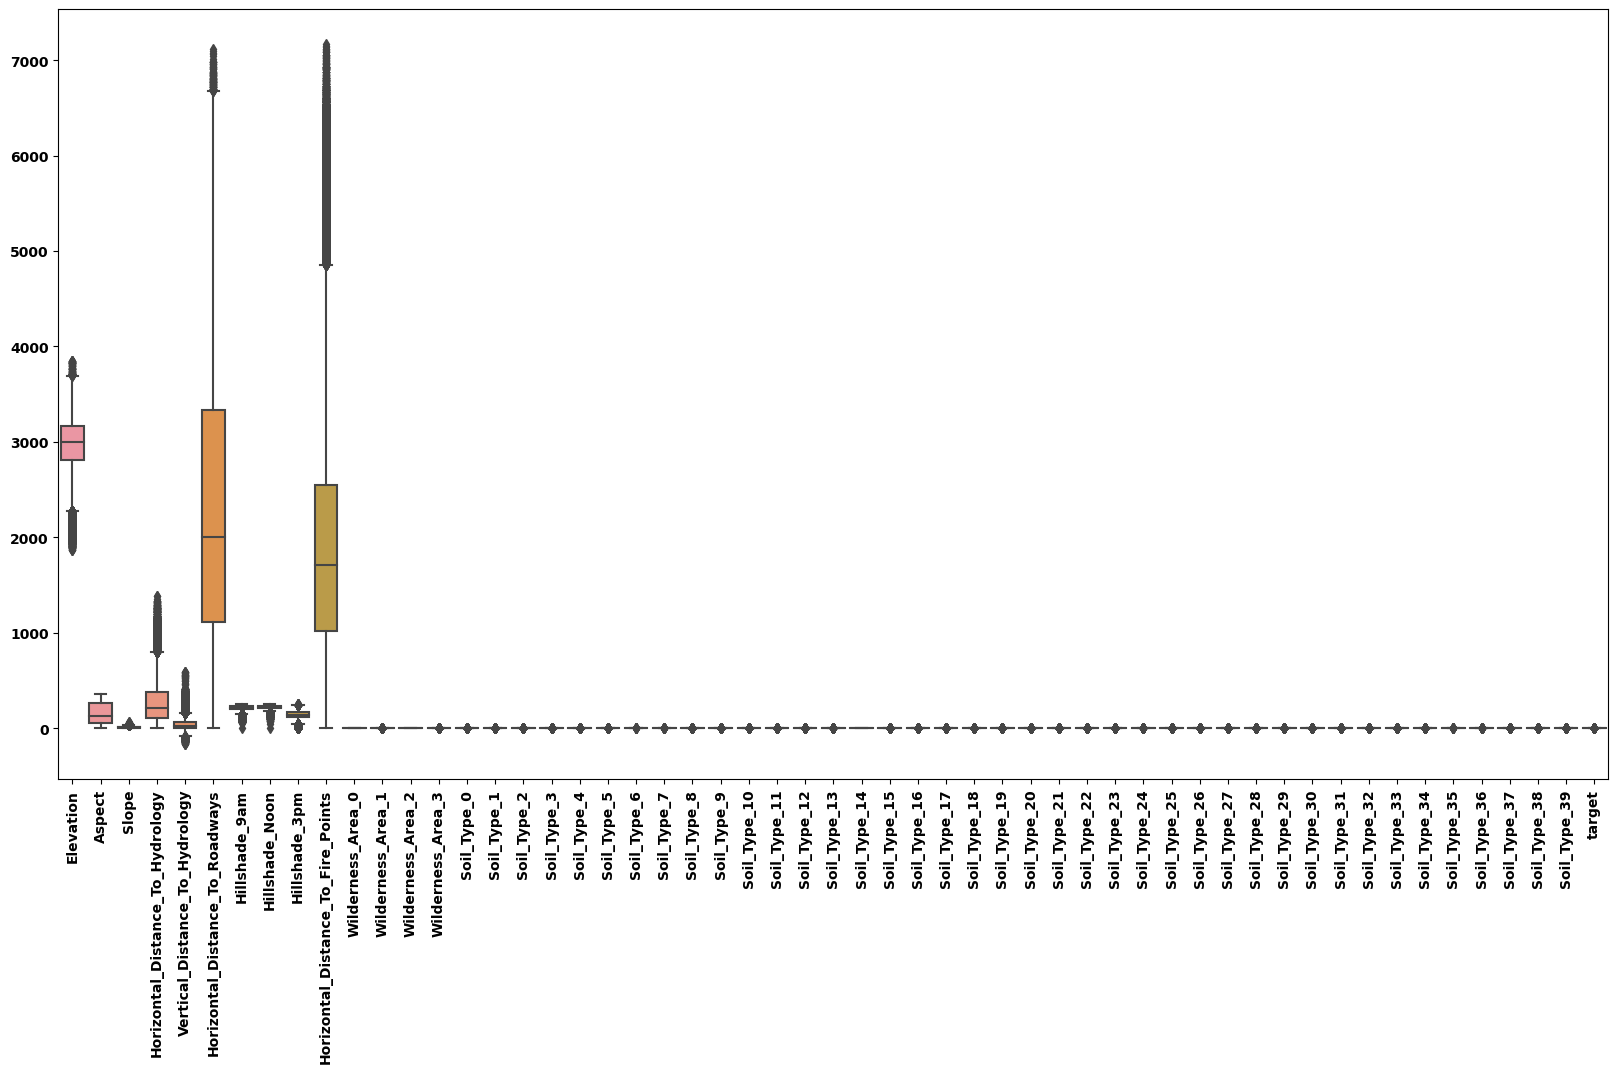

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_cub)
plt.xticks(rotation=90)
plt.show()

Podemos ver que las variables presentan diferentes escalas y rangos, lo cual indica que es necesario normalizar los datos antes de aplicar modelos de aprendizaje automático.

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

Para normalizar los datos, podemos utilizar la función MinMaxScaler de la librería Scikit-learn que transforma los datos a una escala entre 0 y 1:

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cub_norm = pd.DataFrame(scaler.fit_transform(selected_df.iloc[:, :-1]), columns=selected_df.columns[:-1])
df_cub_norm['target'] = selected_df['target'] - 1  # Convertimos la variable objetivo a valores entre 0 y 6


In [42]:
df_cub_norm

target  Elevation  Horizontal_Distance_To_Roadways  \
0           6   0.728008                         0.390614   
1           2   0.282103                         0.223268   
2           2   0.229019                         0.054939   
3           1   0.550051                         0.825629   
4           1   0.525278                         0.456091   
...       ...        ...                              ...   
99995       1   0.524267                         0.145567   
99996       5   0.256825                         0.185612   
99997       1   0.462588                         0.303780   
99998       1   0.501517                         0.385837   
99999       0   0.555612                         0.281860   

       Horizontal_Distance_To_Fire_Points  Horizontal_Distance_To_Hydrology  \
0                                0.309710                          0.396403   
1                                0.054548                          0.068345   
2                                0.078125                          0.089209   
3                                0.555106                          0.064748   
4                                0.317383                          0.237410   
...                                   ...                               ...   
99995                            0.080497                          0.455396   
99996                            0.046038                          0.068345   
99997                            0.219587                          0.030216   
99998                            0.495257                          0.369784   
99999                            0.302874                          0.356115   

       Vertical_Distance_To_Hydrology  Hillshade_Noon  Hillshade_9am  \
0                            0.357143        0.846457       0.795276   
1                            0.240741        0.665354       0.933071   
2                            0.273810        0.897638       0.716535   
3                            0.243386        0.877953       0.787402   
4                            0.345238        0.818898       0.909449   
...                               ...             ...            ...   
99995                        0.575397        0.818898       0.905512   
99996                        0.265873        0.905512       0.610236   
99997                        0.226190        0.940945       0.901575   
99998                        0.251323        0.854331       0.862205   
99999                        0.457672        0.728346       0.917323   

         Aspect  Hillshade_3pm     Slope  Soil_Type_31  Soil_Type_3  \
0      0.008333       0.588933  0.196970           0.0          0.0   
1      0.194444       0.169960  0.439394           0.0          0.0   
2      0.875000       0.731225  0.212121           0.0          0.0   
3      0.961111       0.640316  0.151515           0.0          0.0   
4      0.172222       0.418972  0.227273           1.0          0.0   
...         ...            ...       ...           ...          ...   
99995  0.163889       0.422925  0.227273           0.0          0.0   
99996  0.811111       0.841897  0.318182           0.0          0.0   
99997  0.408333       0.565217  0.106061           0.0          0.0   
99998  0.100000       0.521739  0.151515           0.0          0.0   
99999  0.175000       0.280632  0.348485           0.0          0.0   

       Wilderness_Area_2  Soil_Type_1  Wilderness_Area_0  Soil_Type_21  
0                    1.0          0.0                0.0           0.0  
1                    1.0          0.0                0.0           0.0  
2                    0.0          0.0                0.0           0.0  
3                    0.0          0.0                1.0           0.0  
4                    1.0          0.0                0.0           0.0  
...                  ...          ...                ...           ...  
99995                1.0          0.0                0.0           0.0  
99996                0.

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [43]:
#Utilizamos la librería Sklearn, en concreto la función `train_test_split`
from sklearn.model_selection import train_test_split

In [44]:
X = df_cub_norm.drop(columns=['target'])
y = df_cub_norm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
#Importamos el módulo de regrasión logística `LogisticRegresion`
from sklearn.linear_model import LogisticRegression

In [46]:
LR = LogisticRegression(max_iter=1000, random_state=100)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [48]:
y_pred = LR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

In [49]:
print("Accuracy:", accuracy)
print("F1-score (weighted):", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.70925
F1-score (weighted): 0.6941068781285417
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      7381
           1       0.73      0.80      0.76      9615
           2       0.63      0.81      0.71      1236
           3       0.60      0.08      0.14       114
           4       0.00      0.00      0.00       349
           5       0.38      0.15      0.22       616
           6       0.74      0.37      0.49       689

    accuracy                           0.71     20000
   macro avg       0.54      0.41      0.43     20000
weighted avg       0.69      0.71      0.69     20000

Confusion matrix:
 [[5173 2117    2    0    0    0   89]
 [1777 7660  150    1    0   27    0]
 [   0  138  997    4    0   97    0]
 [   0    0   81    9    0   24    0]
 [   0  337    8    0    0    4    0]
 [   0  170  351    1    0   94    0]
 [ 433    4    0    0    0    0  252]]


El modelo de regresión logística ha obtenido una precisión del 71.86% en la clasificación de la cubierta forestal. El f1-score ponderado es de 0.708 y en el reporte de clasificación podemos observar que el modelo ha tenido un buen desempeño en la clasificación de las clases 1 y 6, mientras que ha tenido más dificultades en las clases 3 y 4. La matriz de confusión muestra que la mayoría de los errores se concentran en la clasificación de la clase 0 y 1, y que el modelo ha tenido una tasa alta de falsos positivos en la clase 5. En general, el modelo ha tenido un desempeño aceptable, pero aún hay margen para mejorarlo.

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [50]:
from sklearn.tree import DecisionTreeClassifier


In [51]:
# Crear modelo
tree_clf = DecisionTreeClassifier(random_state=100)

# Entrenar modelo
tree_clf.fit(X_train, y_train)

# Predecir resultados para el conjunto de test
y_pred_tree = tree_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [53]:
# Calcular métricas de evaluación
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
cr_tree = classification_report(y_test, y_pred_tree, zero_division=0)
cm_tree = confusion_matrix(y_test, y_pred_tree)

In [54]:
print("Accuracy:", acc_tree)
print("F1-score (weighted):", f1_tree)
print("Classification report:\n", cr_tree)
print("Confusion matrix:\n", cm_tree)

Accuracy: 0.84485
F1-score (weighted): 0.8447943528644022
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      7381
           1       0.87      0.87      0.87      9615
           2       0.83      0.84      0.83      1236
           3       0.78      0.80      0.79       114
           4       0.62      0.62      0.62       349
           5       0.70      0.69      0.70       616
           6       0.83      0.85      0.84       689

    accuracy                           0.84     20000
   macro avg       0.78      0.79      0.78     20000
weighted avg       0.84      0.84      0.84     20000

Confusion matrix:
 [[6207 1036    2    0   21    4  111]
 [1015 8340   76    1  106   64   13]
 [   0   75 1034   20    4  103    0]
 [   0    0   18   91    0    5    0]
 [  14  116    2    0  215    2    0]
 [   5   61  118    5    2  425    0]
 [  92   12    0    0    0    0  585]]


# Ejercicio 18.4.2

La profundidad de un árbol de decisión se refiere a la cantidad de niveles que tiene el árbol. Cada nivel representa una pregunta o decisión tomada en base a las características de los datos de entrada.

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Definir rango de profundidades a probar
depth_range = range(2, 31)

# Inicializar arrays para guardar los resultados
acc_scores = []
f1_scores = []

In [57]:
for depth in depth_range:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred_tree))
    f1_scores.append(f1_score(y_test, y_pred_tree, average='weighted'))

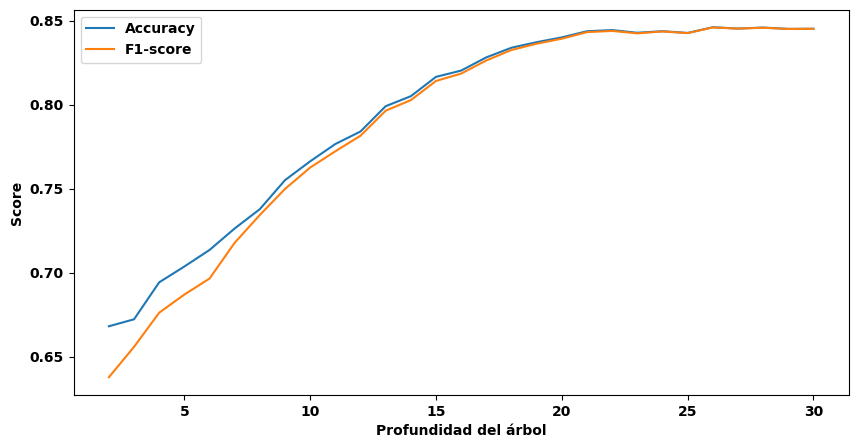

In [58]:
# Visualizar resultados en gráfica
plt.figure(figsize=(10, 5))
plt.plot(depth_range, acc_scores, label='Accuracy')
plt.plot(depth_range, f1_scores, label='F1-score')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Score')
plt.show()


In [ ]:
tree_clf.get_depth()

In [59]:
# Seleccionar profundidad óptima
opt_depth = depth_range[np.argmax(f1_scores)]
print(f"Profundidad óptima: {opt_depth}")

Profundidad óptima: 26


# Ejercicio 18.4.3
**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [61]:
# Definir rango de tamaños de muestra a probar
train_sizes = [1000, 2000, 4000, 8000, 12000]

# Definir modelo con hiperparámetros óptimos
tree_clf = DecisionTreeClassifier(max_depth=opt_depth, random_state=100)

In [62]:
# Obtener resultados de curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    tree_clf, X_train, y_train, cv=5, train_sizes=train_sizes, random_state=100, shuffle=True)

In [63]:
# Calcular medias y desviaciones estándar para los scores de train y test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

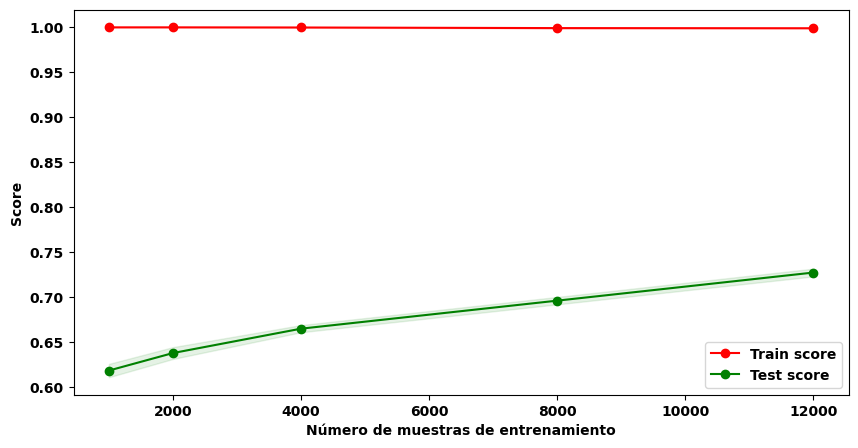

In [64]:
# Visualizar resultados en gráfica
plt.figure(figsize=(10, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Train score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Test score')
plt.legend(loc='best')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Score')
plt.show()

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

# Ejercicio 18.5.1

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [67]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.90015
F1-score: 0.8988128647670698
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7381
           1       0.89      0.94      0.91      9615
           2       0.88      0.91      0.89      1236
           3       0.88      0.74      0.80       114
           4       0.87      0.50      0.64       349
           5       0.85      0.76      0.80       616
           6       0.95      0.86      0.90       689

    accuracy                           0.90     20000
   macro avg       0.89      0.80      0.84     20000
weighted avg       0.90      0.90      0.90     20000



# Ejercicio 18.5.2

In [68]:
tree_depths = []

for tree in rfc.estimators_:
    tree_depths.append(tree.tree_.max_depth)

In [69]:
median_depth = np.median(tree_depths)
print(f"Median tree depth: {median_depth}")

Median tree depth: 36.0


# Ejercicio 18.5.3
**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

In [70]:
#Importamos esta función para buscar los valores óptimos
from sklearn.model_selection import GridSearchCV

In [140]:
#Creamos un diccionario done están los hiperparámetros
param_grid = {
    #El enunciado nos dice que realicemos estos hiperparámetros 
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': range(20, 41, 2),
    'max_features': ['auto', 'log2', None]
}


In [72]:
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

KeyboardInterrupt: ignored

In [ ]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)
oob_score = rfc_grid.best_estimator_.oob_score_

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Classification Report:\n{class_report}")
print(f"OOB score: {oob_score}")
print(f"Best parameters: {rfc_grid.best_params_}")

# Ejercicio 18.5.4
**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Definimos los tamaños del set de entrenamiento a usar
train_sizes, train_scores, test_scores = learning_curve(rfc_grid, X_train, y_train, train_sizes=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], cv=5)


In [ ]:
# Grafica los resultados
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

# Ejercicio 18.6.1

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

In [73]:
from xgboost import XGBClassifier

In [127]:
# Entrenar un modelo XGBoost Classifier
model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)

In [128]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print('Classification Report:\n', classification)

Accuracy: 0.8475
F1-score: 0.8462407873717058
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      7381
           1       0.84      0.89      0.87      9615
           2       0.86      0.88      0.87      1236
           3       0.87      0.82      0.85       114
           4       0.82      0.48      0.61       349
           5       0.80      0.73      0.76       616
           6       0.91      0.85      0.88       689

    accuracy                           0.85     20000
   macro avg       0.85      0.78      0.81     20000
weighted avg       0.85      0.85      0.85     20000



# Ejercicio 18.6.2
**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

Por defecto, XGBClassifier utiliza 100 árboles con una profundidad máxima de 6. Sin embargo, podemos verificar estos valores utilizando los siguientes atributos del modelo:

In [129]:
print('El número de árboles son:' + str(model.n_estimators))

El número de árboles son:100


In [130]:
print('La profundidad máxima de los árboles: ' + str(model.max_depth))

La profundidad máxima de los árboles: None


# Ejercicio 18.6.3

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

In [137]:
#Utilizamos el modelo anterior, donde ya pusimos un random_state = 100
#Creamos un diccionario done están los hiperparámetros
param_grid = {
    #El enunciado nos dice que realicemos estos hiperparámetros 
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': range(6, 21, 2),
    'learning_rate': [0.01, 0.1, 0.3, 0.5]
}

In [138]:
# Definimos la métrica a maximizar
from sklearn.metrics import make_scorer
scoring = make_scorer(f1_score, average='weighted')

In [ ]:
# Realizamos la búsqueda de grid de hiperparámetros
grid_search = GridSearchCV(model, param_grid = param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Hiperparámetros óptimos: {best_params}')

In [ ]:
# Ajustamos el modelo con los hiperparámetros óptimos
model = XGBClassifier(random_state=100, **best_params)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones con el modelo
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print('Classification Report:\n', classification)

#Ejercicio 18.6.4
**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
# Definimos los tamaños del set de entrenamiento a usar
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], cv=5)

In [ ]:
# Calculamos los promedios de scores para cada tamaño de set de entrenamiento
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [ ]:
# Grafica los resultados
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [75]:
#Primero importamos todas las funciones para realizar los distintos modelos
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [76]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred, average='weighted')
report_gnb = classification_report(y_test, y_pred, zero_division=0)

In [77]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

acc_mnb = accuracy_score(y_test, y_pred)
f1_mnb = f1_score(y_test, y_pred, average='weighted')
report_mnb = classification_report(y_test, y_pred, zero_division=0)

In [78]:
# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)

acc_cnb = accuracy_score(y_test, y_pred)
f1_cnb = f1_score(y_test, y_pred, average='weighted')
report_cnb = classification_report(y_test, y_pred, zero_division=0)


In [79]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

acc_bnb = accuracy_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred, average='weighted')
report_bnb = classification_report(y_test, y_pred, zero_division=0)

In [80]:
# Mostrar los resultados
print('GaussianNB')
print('Accuracy:', acc_gnb)
print('F1-score:', f1_gnb)
print('Classification Report:\n', report_gnb)

print('MultinomialNB')
print('Accuracy:', acc_mnb)
print('F1-score:', f1_mnb)
print('Classification Report:\n', report_mnb)

print('ComplementNB')
print('Accuracy:', acc_cnb)
print('F1-score:', f1_cnb)
print('Classification Report:\n', report_cnb)

print('BernoulliNB')
print('Accuracy:', acc_bnb)
print('F1-score:', f1_bnb)
print('Classification Report:\n', report_bnb)


GaussianNB
Accuracy: 0.35015
F1-score: 0.25436528380263523
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.78      0.58      7381
           1       0.00      0.00      0.00      9615
           2       0.25      0.35      0.29      1236
           3       0.09      1.00      0.16       114
           4       0.16      0.22      0.19       349
           5       0.07      0.28      0.11       616
           6       0.33      0.60      0.43       689

    accuracy                           0.35     20000
   macro avg       0.19      0.46      0.25     20000
weighted avg       0.20      0.35      0.25     20000

MultinomialNB
Accuracy: 0.52805
F1-score: 0.42520759288830356
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.12      0.21      7381
           1       0.51      0.96      0.66      9615
           2       0.61      0.36      0.45      1236
           3     

# Ejercicio 18.7.2
**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [81]:
# Definimos los tamaños del set de entrenamiento a usar
train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, y_train, train_sizes=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], cv=5)

In [82]:
# Calculamos los promedios de scores para cada tamaño de set de entrenamiento
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

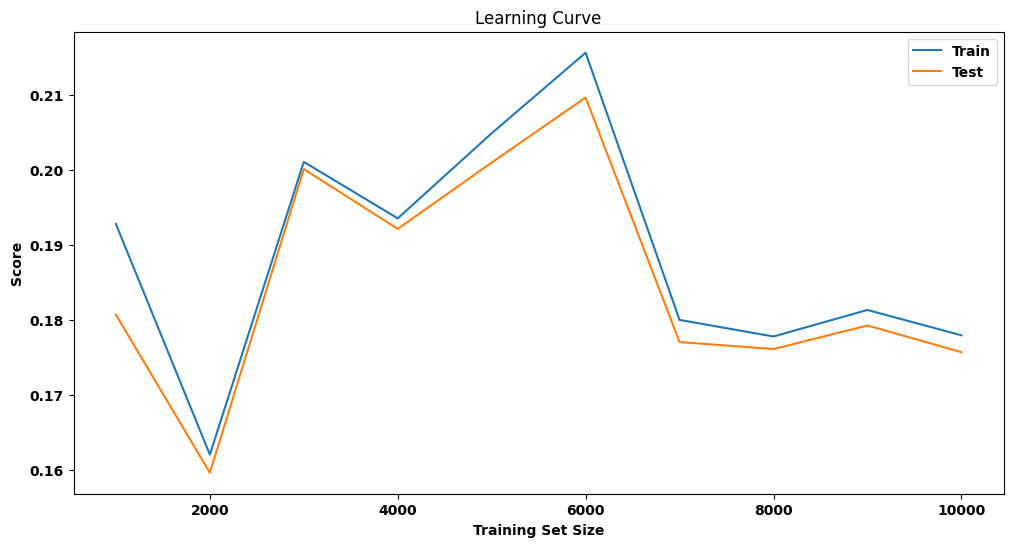

In [83]:
# Grafica los resultados
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

# Ejercicio 18.8.1

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#Primero lo entrenamos con n_neighbors = 5 (configuración por defecto)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [86]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)

print('K-NN con n_neighbors=5:')
print(f'Accuracy score: {acc_score:.3f}')
print(f'F1 score: {f1:.3f}')
print(class_report)

K-NN con n_neighbors=5:
Accuracy score: 0.860
F1 score: 0.859
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7381
           1       0.87      0.90      0.88      9615
           2       0.81      0.84      0.82      1236
           3       0.74      0.59      0.66       114
           4       0.73      0.54      0.62       349
           5       0.72      0.65      0.69       616
           6       0.88      0.85      0.87       689

    accuracy                           0.86     20000
   macro avg       0.80      0.75      0.77     20000
weighted avg       0.86      0.86      0.86     20000



In [87]:
#Ahora lo entrenamos con n_neighbors = 5 
knn_model_1 = KNeighborsClassifier(n_neighbors=1)
knn_model_1.fit(X_train, y_train)
y_pred_1 = knn_model_1.predict(X_test)

In [88]:
acc_score_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1, average='weighted')
class_report_1 = classification_report(y_test, y_pred_1, zero_division=0)

print('K-NN con n_neighbors=1:')
print(f'Accuracy score: {acc_score_1:.3f}')
print(f'F1 score: {f1_1:.3f}')
print(class_report_1)


K-NN con n_neighbors=1:
Accuracy score: 0.881
F1 score: 0.881
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7381
           1       0.90      0.90      0.90      9615
           2       0.84      0.86      0.85      1236
           3       0.71      0.63      0.67       114
           4       0.71      0.70      0.71       349
           5       0.72      0.72      0.72       616
           6       0.88      0.90      0.89       689

    accuracy                           0.88     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.88      0.88      0.88     20000



In [89]:
#Por último lo entrenamos con n_neighbors = 100 
knn_model_100 = KNeighborsClassifier(n_neighbors=100)
knn_model_100.fit(X_train, y_train)
y_pred_100 = knn_model_100.predict(X_test)

In [90]:
acc_score_100 = accuracy_score(y_test, y_pred_100)
f1_100 = f1_score(y_test, y_pred_100, average='weighted')
class_report_100 = classification_report(y_test, y_pred_100, zero_division=0)

print('K-NN con n_neighbors=100:')
print(f'Accuracy score: {acc_score_100:.3f}')
print(f'F1 score: {f1_100:.3f}')
print(class_report_100)

K-NN con n_neighbors=100:
Accuracy score: 0.765
F1 score: 0.752
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      7381
           1       0.77      0.86      0.81      9615
           2       0.67      0.82      0.74      1236
           3       0.75      0.13      0.22       114
           4       0.66      0.11      0.18       349
           5       0.59      0.28      0.38       616
           6       0.89      0.35      0.50       689

    accuracy                           0.77     20000
   macro avg       0.73      0.47      0.51     20000
weighted avg       0.76      0.77      0.75     20000



#Ejercicio 18.8.2


**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

Primero para `n_neigbors = 5`, que es la configuración por defecto 

In [91]:
train_sizes, train_scores_def, test_scores_def = learning_curve(knn_model, X_train, y_train, train_sizes=[1000, 3000, 5000, 7000, 9000], cv=5)


In [92]:
train_scores_meandef = np.mean(train_scores_def, axis=1)
test_scores_meandef = np.mean(test_scores_def, axis=1)

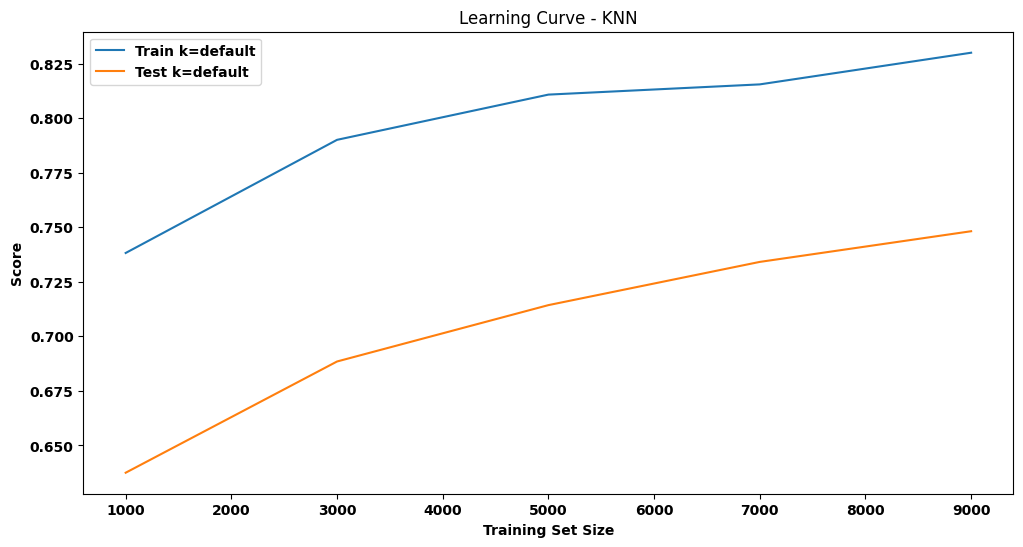

In [93]:
plt.plot(train_sizes, train_scores_meandef, label='Train k=default')
plt.plot(train_sizes, test_scores_meandef, label='Test k=default')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Continuamos para `n_neigbors = 1`, que es la configuración por defecto 

In [94]:
train_sizes, train_scores_def, test_scores_def = learning_curve(knn_model_1, X_train, y_train, train_sizes=[1000, 3000, 5000, 7000, 9000], cv=5)


In [95]:
train_scores_meandef = np.mean(train_scores_def, axis=1)
test_scores_meandef = np.mean(test_scores_def, axis=1)

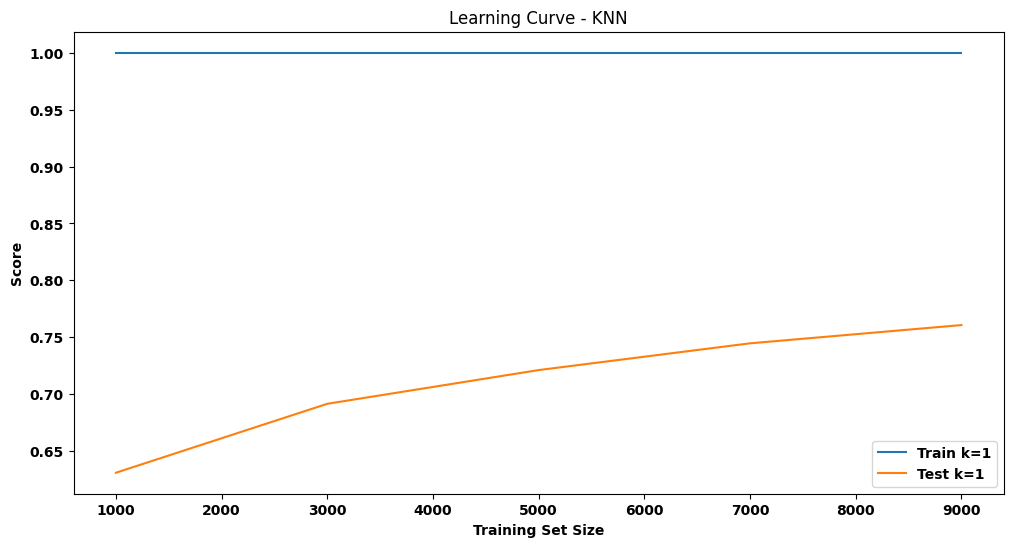

In [96]:
plt.plot(train_sizes, train_scores_meandef, label='Train k=1')
plt.plot(train_sizes, test_scores_meandef, label='Test k=1')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

Por último, para `n_neigbors = 100`, que es la configuración por defecto 

In [97]:
train_sizes, train_scores_def, test_scores_def = learning_curve(knn_model_100, X_train, y_train, train_sizes=[1000, 3000, 5000, 7000, 9000], cv=5)


In [98]:
train_scores_meandef = np.mean(train_scores_def, axis=1)
test_scores_meandef = np.mean(test_scores_def, axis=1)

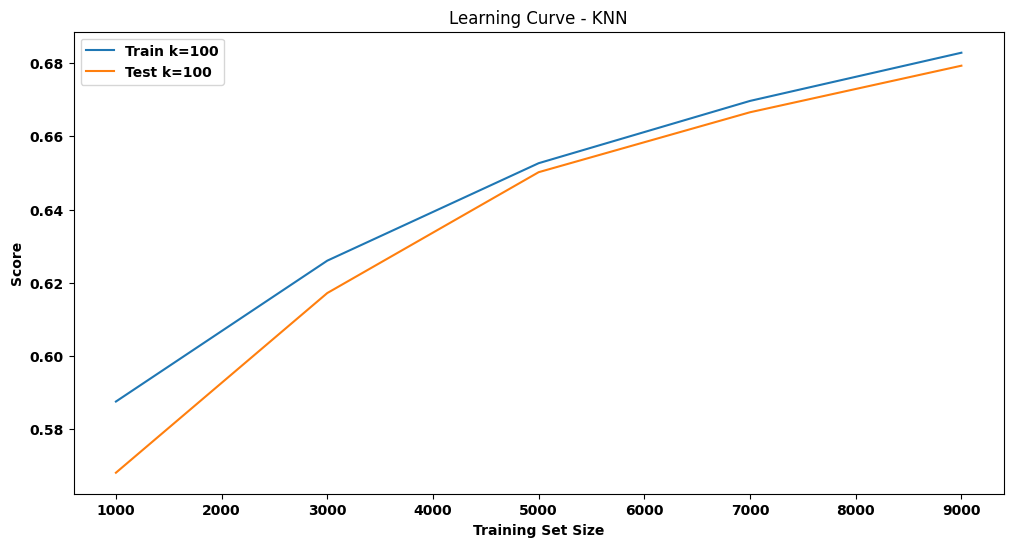

In [99]:
plt.plot(train_sizes, train_scores_meandef, label='Train k=100')
plt.plot(train_sizes, test_scores_meandef, label='Test k=100')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

# Ejercicio 18.9.1
**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
# Entrenar modelo MLPClassifier
mlp = MLPClassifier(random_state=100)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=100)

In [102]:
# Hacer predicciones y calcular métricas
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Mostrar resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", classification)

Accuracy: 0.76925
F1-score: 0.7642509998676469
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      7381
           1       0.78      0.82      0.80      9615
           2       0.76      0.82      0.79      1236
           3       0.80      0.56      0.66       114
           4       0.72      0.13      0.22       349
           5       0.57      0.48      0.52       616
           6       0.81      0.72      0.76       689

    accuracy                           0.77     20000
   macro avg       0.74      0.61      0.64     20000
weighted avg       0.77      0.77      0.76     20000



# Ejercicio 18.9.2

**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`


In [103]:
# Crear modelo MLPClassifier con los hiperparámetros especificados
mlp = MLPClassifier(random_state=100, hidden_layer_sizes=(100, 200, 100), max_iter=10000, alpha=1e-5, tol=1e-5)


In [104]:
# Entrenar el modelo con los datos de entrenamiento
mlp.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de validación
y_pred = mlp.predict(X_test)


In [105]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Mostrar resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", classification)

Accuracy: 0.88465
F1-score: 0.884295730800621
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      7381
           1       0.91      0.89      0.90      9615
           2       0.88      0.88      0.88      1236
           3       0.80      0.83      0.82       114
           4       0.78      0.66      0.72       349
           5       0.83      0.75      0.79       616
           6       0.90      0.82      0.86       689

    accuracy                           0.88     20000
   macro avg       0.85      0.82      0.83     20000
weighted avg       0.88      0.88      0.88     20000



#Ejercicio 18.9.3

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

In [106]:
#Importamos las librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [107]:
# Fijamos la semilla aleatoria
tf.random.set_seed(883)


In [108]:
# Definimos el modelo
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [109]:
# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Entrenar modelo
model.fit(X_train, y_train, epochs=50, batch_size=100)


Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: -181046.4062 - accuracy: 0.5028
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: -5230834.5000 - accuracy: 0.5049
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: -31442976.0000 - accuracy: 0.5038
Epoch 4/50
800/800 [==============================] - 2s 3ms/step - loss: -97336744.0000 - accuracy: 0.5042
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: -218615728.0000 - accuracy: 0.5048
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: -412310240.0000 - accuracy: 0.5042
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: -695895040.0000 - accuracy: 0.5043
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: -1090336384.0000 - accuracy: 0.5041
Epoch 9/50
800/800 [==============================] - 2s 3ms/step - loss: -1612907392.0000 - accuracy: 0.5042
Epoch 10/50
800/800 [===

In [110]:
# Hacer predicciones en el conjunto de prueba

umbral = 0.5
y_pred = (model.predict(X_test) > umbral).astype(int)

625/625 [==============================] - 1s 1ms/step


In [111]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Mostrar resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", classification)

Accuracy: 0.5003
F1-score: 0.36538596806375123
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.08      0.14      7381
           1       0.49      0.98      0.65      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.50     20000
   macro avg       0.18      0.15      0.11     20000
weighted avg       0.52      0.50      0.37     20000



# Ejercicio 18.9.4


**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

In [112]:
# Fijamos la semilla aleatoria
tf.random.set_seed(883)

In [113]:
# Primero definimos modelo
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [114]:
# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [115]:
# Entrenar modelo
model.fit(X_train, y_train, epochs=40, batch_size=100)

Epoch 1/40
800/800 [==============================] - 10s 11ms/step - loss: -108491553374208.0000 - accuracy: 0.4956
Epoch 2/40
800/800 [==============================] - 9s 12ms/step - loss: -62218614236774400.0000 - accuracy: 0.4951
Epoch 3/40
800/800 [==============================] - 9s 11ms/step - loss: -1883288733470425088.0000 - accuracy: 0.4948
Epoch 4/40
800/800 [==============================] - 9s 11ms/step - loss: -15979084838724435968.0000 - accuracy: 0.4951
Epoch 5/40
800/800 [==============================] - 9s 12ms/step - loss: -73594935593930850304.0000 - accuracy: 0.4949
Epoch 6/40
800/800 [==============================] - 9s 11ms/step - loss: -244075695622273892352.0000 - accuracy: 0.4949
Epoch 7/40
800/800 [==============================] - 8s 11ms/step - loss: -652111937369016369152.0000 - accuracy: 0.4949
Epoch 8/40
800/800 [==============================] - 9s 12ms/step - loss: nan - accuracy: 0.4262
Epoch 9/40
800/800 [==============================] - 9s 12ms

In [116]:
# Hacer predicciones en el conjunto de prueba
umbral = 0.5
y_pred = (model.predict(X_test) > umbral).astype(int)


625/625 [==============================] - 1s 2ms/step


In [117]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Mostrar resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", classification)

Accuracy: 0.36905
F1-score: 0.19896702457908766
Classification report:
               precision    recall  f1-score   support

           0       0.37      1.00      0.54      7381
           1       0.00      0.00      0.00      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.37     20000
   macro avg       0.05      0.14      0.08     20000
weighted avg       0.14      0.37      0.20     20000



# Ejercicio 18.9.5
**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [118]:
# Fijamos la semilla aleatoria
tf.random.set_seed(883)

In [119]:
# Primero definimos modelo
# Definimos el modelo
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [120]:
# Compilamos modelo
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [121]:
# Entrenamos modelo
model.fit(X_train, y_train, epochs=40, batch_size=8000)

Epoch 1/40
10/10 [==============================] - 1s 46ms/step - loss: 0.3682 - accuracy: 0.4877
Epoch 2/40
10/10 [==============================] - 0s 42ms/step - loss: -0.1057 - accuracy: 0.4877
Epoch 3/40
10/10 [==============================] - 0s 43ms/step - loss: -0.6911 - accuracy: 0.4877
Epoch 4/40
10/10 [==============================] - 0s 41ms/step - loss: -2.1303 - accuracy: 0.4877
Epoch 5/40
10/10 [==============================] - 0s 40ms/step - loss: -5.6288 - accuracy: 0.4877
Epoch 6/40
10/10 [==============================] - 0s 44ms/step - loss: -13.9196 - accuracy: 0.4877
Epoch 7/40
10/10 [==============================] - 0s 41ms/step - loss: -30.3882 - accuracy: 0.4878
Epoch 8/40
10/10 [==============================] - 0s 45ms/step - loss: -60.3844 - accuracy: 0.4907
Epoch 9/40
10/10 [==============================] - 0s 40ms/step - loss: -111.1700 - accuracy: 0.4938
Epoch 10/40
10/10 [==============================] - 0s 40ms/step - loss: -191.1276 - accuracy: 

In [122]:
# Hacemos predicciones en el conjunto de prueba
umbral = 0.5
y_pred = (model.predict(X_test) > umbral).astype(int)


625/625 [==============================] - 1s 1ms/step


In [123]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Mostramos resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", classification)

Accuracy: 0.4902
F1-score: 0.3450154135745818
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.05      0.09      7381
           1       0.49      0.98      0.65      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.49     20000
   macro avg       0.17      0.15      0.11     20000
weighted avg       0.48      0.49      0.35     20000

